## 가위바위보 분류기 만들기

웹캠을 사용하여 데이터를 준비해봅시다!  

1) 데이터 만들기
노트북 전면 카메라를 활용하여 가위, 바위, 보 이미지를 각각 100장을 만들어봅시다.  

- https://teachablemachine.withgoogle.com/

2) 가위 이미지 데이터 만들기

웹캠 앞에서 포즈를 가위 포즈를 취한 후, <Hold to Record>버튼을 누르면 이미지가 캡쳐됩니다. 
- 여러 각도에서 찍기
- 여러 크기로 찍기
- 배경이 깔끔할 수록 좋음 (단색배경)

![](https://d3s0tskafalll9.cloudfront.net/media/images/E-1-9.max-800x600.png)

![](https://d3s0tskafalll9.cloudfront.net/media/images/E-1-10.max-800x600.png)

3) 100장의 가위 이미지를 캡쳐했다면, 우상단의 메뉴 아이콘을 눌러 다운로드 합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-1-11.png)

4) 가위 이미지들을 "scissor.zip"이라는 파일 이름으로 본인 컴퓨터에 저장해봅시다.
바위와 보 이미지들에 대해서도 위 과정을 진행해주세요!  
(각각, "rock.zip", "paper.zip", 이름을 저장해주세요!)

- 이미지 예시  
`ock_scissor_paper/paper` 폴더 내 이미지들은 아래와 같이 저장이 되어 있을 것입니다.



![](https://d3s0tskafalll9.cloudfront.net/media/images/E-1-12.max-800x600.png)

5) 데이터불러오기 + Resize하기  

숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 합니다. 이를 위해서는 PIL 라이브러리를 사용해봅시다

In [1]:
## 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
## 학습데이터.zip 업로드
from google.colab import files
file_uploaded = files.upload()

Saving rock_scissors_paper_tak.zip to rock_scissors_paper_tak.zip


In [12]:
!unzip "rock_scissors_paper_tak.zip" 
!unzip "scissors.zip" 
!unzip "papper.zip" 
!unzip "rock.zip"

Archive:  rock_scissors_paper_tak.zip
  inflating: papper.zip              
  inflating: rock.zip                
  inflating: scissors.zip            
Archive:  scissors.zip
  inflating: scissors/0.jpg          
  inflating: scissors/1.jpg          
  inflating: scissors/10.jpg         
  inflating: scissors/11.jpg         
  inflating: scissors/12.jpg         
  inflating: scissors/13.jpg         
  inflating: scissors/14.jpg         
  inflating: scissors/15.jpg         
  inflating: scissors/16.jpg         
  inflating: scissors/17.jpg         
  inflating: scissors/18.jpg         
  inflating: scissors/19.jpg         
  inflating: scissors/2.jpg          
  inflating: scissors/20.jpg         
  inflating: scissors/21.jpg         
  inflating: scissors/22.jpg         
  inflating: scissors/23.jpg         
  inflating: scissors/24.jpg         
  inflating: scissors/25.jpg         
  inflating: scissors/26.jpg         
  inflating: scissors/27.jpg         
  inflating: scissors/28.jp

In [13]:
from PIL import Image
import os, glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [15]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
#image_dir_path = "./scissor/"
image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_papper_tak/scissors'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [17]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_papper_tak/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")


100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [18]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_papper_tak/papper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [19]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/drive/MyDrive/dataset/rock_scissor_papper_tak"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 100 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  1


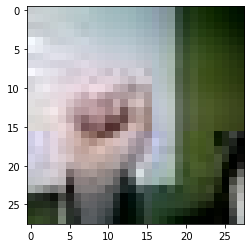

In [20]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계하기

In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

#model.summary()
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16,                               # 깊이(depth)
                              (3, 3),                           # 필터 사이즈
                              padding='same',                   # same: 픽셀 추출 후 리사이즈 될때 크기를 보간하여 사이즈를 동일하게 함
                                                                # vaild: 픽셀 추출 후 리사이즈 될때 크기가 작아짐     
                              activation='relu',                # 선형> 비선형화 시켜줌으로써 좀 더 예측이 정확해지는 효과
                              input_shape=(28, 28, 3)))         # (사이즈, 사이즈, 채널), 채널 = 1: 흑백, 2= ?, 3 = 컬러
model.add(keras.layers.MaxPool2D(2,2))                          # MaxPool2D 이미지 크기의 연산값을 1/2로 줄여주는 개념
                                                                # 이미지에 있는 중요한 정보들만 추출하여 학습을 하기 위함
model.add(keras.layers.Conv2D(64, (3, 3),
                              padding='same',
                              activation='relu'))   # 첫줄 이후에는 input_shape 불필요
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())                   # 2차원의 형태를 1차원의 형태로로 펼쳐주는 역할을 하는 함수
model.add(keras.layers.Dense(16, activation='relu')) 
model.add(keras.layers.Dense(3, activation='softmax')) # 가위 /바위 /보

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 16)                5

## 딥러닝 네트워크 학습시키기

In [22]:
print('Before Reshape - x_train_norm shape : {}'.format(x_train_norm.shape))
x_train_reshape = x_train_norm.reshape(-1, 28, 28, 3)
print('After Reshape - x_train_reshaped shape : {}'.format(x_train_reshape.shape))

Before Reshape - x_train_norm shape : (300, 28, 28, 3)
After Reshape - x_train_reshaped shape : (300, 28, 28, 3)


In [23]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_reshape, y_train, epochs=20)

Epoch 1/20
10/10 [==============================] - 1s 27ms/step - loss: 0.8682 - accuracy: 0.3733
Epoch 2/20
10/10 [==============================] - 0s 25ms/step - loss: 0.6676 - accuracy: 0.7000
Epoch 3/20
10/10 [==============================] - 0s 28ms/step - loss: 0.4803 - accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - 0s 27ms/step - loss: 0.2109 - accuracy: 1.0000
Epoch 5/20
10/10 [==============================] - 0s 36ms/step - loss: 0.0472 - accuracy: 1.0000
Epoch 6/20
10/10 [==============================] - 0s 29ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 0s 27ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 8/20
10/10 [==============================] - 0s 26ms/step - loss: 8.4795e-04 - accuracy: 1.0000
Epoch 9/20
10/10 [==============================] - 0s 26ms/step - loss: 5.8312e-04 - accuracy: 1.0000
Epoch 10/20
10/10 [==============================] - 0s 27ms/step - loss: 4.7085e-04 - accuracy: 1.00

## 테스트하기

In [24]:
from PIL import Image
import os, glob

def resize_images(img_path): # 224 x 224 -> 28 x 28
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [25]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
image_dir_path = "/content/drive/MyDrive/Colab Notebooks/멀캠_빅데이터_7_8/dataset/rock_paper_scissors_sek" # 다른 사람 데이터경로
(x_test, y_test) = load_data(image_dir_path)
x_test_norm = x_test/255.0

print("x_test : {}".format(x_test.shape))
print("y_test : {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
x_test : (300, 28, 28, 3)
y_test : (300,)


In [26]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 1.5091e-04 - accuracy: 1.0000 - 265ms/epoch - 27ms/step
test_loss : 0.00015090756642166525
test_accuracy : 1.0


## 더 좋은 네트워크 만들기

In [30]:
## 학습데이터.zip 업로드
from google.colab import files
file_uploaded = files.upload()

Saving rock_scissors_paper_train.zip to rock_scissors_paper_train.zip


In [35]:
!unzip "rock_scissors_paper_train.zip"
!unzip "scissors.zip" 
!unzip "papper.zip" 
!unzip "rock.zip"

Archive:  rock_scissors_paper_train.zip
  inflating: papper.zip              
  inflating: rock.zip                
  inflating: scissors.zip            
Archive:  scissors.zip
  inflating: scissors/0.jpg          
  inflating: scissors/1.jpg          
  inflating: scissors/10.jpg         
  inflating: scissors/102_0.jpg      
  inflating: scissors/102_1.jpg      
  inflating: scissors/102_10.jpg     
  inflating: scissors/102_11.jpg     
  inflating: scissors/102_12.jpg     
  inflating: scissors/102_13.jpg     
  inflating: scissors/102_14.jpg     
  inflating: scissors/102_15.jpg     
  inflating: scissors/102_16.jpg     
  inflating: scissors/102_17.jpg     
  inflating: scissors/102_18.jpg     
  inflating: scissors/102_19.jpg     
  inflating: scissors/102_2.jpg      
  inflating: scissors/102_20.jpg     
  inflating: scissors/102_21.jpg     
  inflating: scissors/102_22.jpg     
  inflating: scissors/102_23.jpg     
  inflating: scissors/102_24.jpg     
  inflating: scissors/102

In [36]:
from PIL import Image
import os, glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [38]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
#image_dir_path = "./scissor/"
image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_papper_tak/scissors'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_papper_tak/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
image_dir_path = '/content/drive/MyDrive/dataset/rock_scissor_papper_tak/papper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")


100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [40]:
import numpy as np

def load_data(img_path, number_of_data=4140):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/content/rock_scissors_paper_train.zip"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 0 입니다.
x_train shape: (4140, 28, 28, 3)
y_train shape: (4140,)


라벨:  0


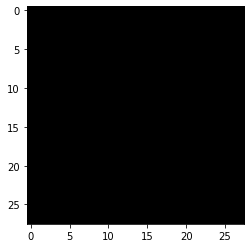

In [41]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]

#model.summary()
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu')) 
model.add(keras.layers.Dense(3, activation='softmax')) # 가위 /바위 /보

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        9280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 16)               

In [43]:
print('Before Reshape - x_train_norm shape : {}'.format(x_train_norm.shape))
x_train_reshape = x_train_norm.reshape(-1, 28, 28, 3)
print('After Reshape - x_train_reshaped shape : {}'.format(x_train_reshape.shape))

Before Reshape - x_train_norm shape : (4140, 28, 28, 3)
After Reshape - x_train_reshaped shape : (4140, 28, 28, 3)


In [44]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_reshape, y_train, epochs=20)

Epoch 1/20
130/130 [==============================] - 4s 27ms/step - loss: 1.0163 - accuracy: 1.0000
Epoch 2/20
130/130 [==============================] - 4s 28ms/step - loss: 0.8643 - accuracy: 1.0000
Epoch 3/20
130/130 [==============================] - 4s 27ms/step - loss: 0.7340 - accuracy: 1.0000
Epoch 4/20
130/130 [==============================] - 4s 27ms/step - loss: 0.6238 - accuracy: 1.0000
Epoch 5/20
130/130 [==============================] - 4s 27ms/step - loss: 0.5314 - accuracy: 1.0000
Epoch 6/20
130/130 [==============================] - 4s 27ms/step - loss: 0.4544 - accuracy: 1.0000
Epoch 7/20
130/130 [==============================] - 4s 27ms/step - loss: 0.3904 - accuracy: 1.0000
Epoch 8/20
130/130 [==============================] - 4s 28ms/step - loss: 0.3371 - accuracy: 1.0000
Epoch 9/20
130/130 [==============================] - 4s 32ms/step - loss: 0.2927 - accuracy: 1.0000
Epoch 10/20
130/130 [==============================] - 5s 35ms/step - loss: 0.2555 - accura

In [45]:
from PIL import Image
import os, glob

def resize_images(img_path): # 224 x 224 -> 28 x 28
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [ ]:
테스트

In [46]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
# [[YOUR CODE]]
image_dir_path = "/content/drive/MyDrive/dataset/test/rock_scissor_paper.zip" # test 데이터 입력
x_test_norm = x_test/255.0

print("x_test : {}".format(x_test.shape))
print("y_test : {}".format(y_test.shape))

x_test : (300, 28, 28, 3)
y_test : (300,)


In [47]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 0.0797 - accuracy: 1.0000 - 411ms/epoch - 41ms/step
test_loss : 0.07971664518117905
test_accuracy : 1.0


In [53]:
# VGG16 모델 만들기

import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(1,1))

model.add(keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D(1,1))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu')) 
model.add(keras.layers.Dense(128, activation='relu')) 
model.add(keras.layers.Dense(3, activation='softmax')) # 가위 /바위 /보
# Dense는 차원수를 낮춰가면서 정밀도를 높이는 개념 , 결국 가위바위보라는 3가지 형태로 나누어지므로 마지막은 3

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_56 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 conv2d_57 (Conv2D)          (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_58 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 conv2d_59 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                 